[View in Colaboratory](https://colab.research.google.com/github/PeterCapaldi/yelp_Dataset_Experiments/blob/master/google_drive_yelp.ipynb)

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
# 1. Authenticate and create the PyDrive client.


class googleDriveFileFetch:
  def __init__(self):
    self.gauth = GoogleAuth()
    self.drive=None
    self.file=None
  def initCredentials(self):
    self.gauth.credentials = GoogleCredentials.get_application_default()
  def initDrive(self):
    self.drive=GoogleDrive(self.gauth)
  def getFileList(self,until=1):
    iter=0
    file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
    for file1 in file_list:
      if iter>until:
        break
      print('title: %s, id: %s' % (file1['title'], file1['id']))
      iter+=1
  def downloadFile(self,fileID='1ATvV46lvvIG4q845h0_KOU9jiBcGw6-B',outputName='l.tar'):
    self.file = drive.CreateFile({'id': fileID})
    self.file.GetContentFile(outputName)
  def listFiles(self):
    !ls
  def tryExtract(self):
    !tar -xvf l.tar
    
dfetch= googleDriveFileFetch()
dfetch.initCredentials()
dfetch.initDrive()
dfetch.getFileList()
dfetch.downloadFile()
dfetch.tryExtract()
dfetch.listFiles()

title: WorldBankProject.ipynb, id: 1w7cqH74DqXy-E4TOhTBjbqGaqnUTXRlK
title: Copy of yelp_dataset_round8.tar, id: 1ATvV46lvvIG4q845h0_KOU9jiBcGw6-B
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
./._Dataset_Challenge_Academic_Dataset_Agreement.pdf
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
Dataset_Challenge_Academic_Dataset_Agreement.pdf
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
./._Yelp_Dataset_Challenge_Terms_round_8.pdf
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHI

In [0]:
!ls

datalab  l.tar


In [0]:
!tar -xvf l.tar

tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
./._Dataset_Challenge_Academic_Dataset_Agreement.pdf
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
Dataset_Challenge_Academic_Dataset_Agreement.pdf
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
./._Yelp_Dataset_Challenge_Terms_round_8.pdf
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
Yelp_Dataset_Challenge_Terms_round_8.pdf
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown ex

In [0]:
!ls


datalab
Dataset_Challenge_Academic_Dataset_Agreement.pdf
l.tar
yelp_academic_dataset_business.json
yelp_academic_dataset_checkin.json
yelp_academic_dataset_review.json
yelp_academic_dataset_tip.json
yelp_academic_dataset_user.json
Yelp_Dataset_Challenge_Terms_round_8.pdf


In [0]:
!pip install -q mlxtend
import json
import nltk

nltk.download('punkt')
nltk.download('stopwords')
import numpy as np
from nltk import pos_tag, word_tokenize
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression



[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


***Preprocessing(basic)***

*   Tokenizing
*   Stop word removal
*   Stemming

**To run the model:**
* Download review.json from https://www.yelp.com/dataset.
* Put review.json in same directory as this script.

**Particularities to DATaSET**

*   The Yelp dataset contains tasks for  photo classification, graph mining and natural language processing & sentiment analysis.
*    We go for NLP part.
*   While  parsing the reviews.JSON file we take only star ratings and text reviews all the other information is ignored.
*   The raw data is stored in three different dictionaries on the basis of review, sentiments and stars.
*    In the data pre-processing phase, the entire text is converted into lowercase to reduce redundancy in subsequent feature selection. 
 *   Regular Expression for punctuation and other redundant special char removal




In [0]:
def tokenize_Review_text(reviewList):
  """
      Tokenizing words in each review
  """
  tokenizedWords = {}
  for review in reviewList:
      tokenizedWords[review[0]] = word_tokenize(review[1])
  return tokenizedWords


def buildLexicon(tokenizedWords):
  """
      Determining unique words through all reviews
  """
  lexicon = set()
  i = 1
  for i in range(1, len(tokenizedWords) + 1):
    lexicon.update(tokenizedWords[i])
  return lexicon


def tf(word, tokenizedWords):
  """
    Counting the term frequency(tf) for TF/IDF matrix
  """
  return tokenizedWords.count(word)


def createTfIdfMatrix(tokenizedWords):
  """
    USind TF/IDF, 
    to determine how unique a particular word is to document.
    Gererating the TFIDF matrix using individual words TF?IDF score
  """
  lexicon = buildLexicon(tokenizedWords)
  tf_vector = {}
  for i in range(1, len(tokenizedWords) + 1):
    tf_vector[i] = [tf(word, tokenizedWords[i]) for word in lexicon]
  return lexicon, tf_vector


def createTags(dictSent):
  """
   creating tags
  """
  tags = dictSent.values()
  return tags





def removeStopwords(tokenizedWords):
  """
    Removing stop words using NLTK inbuilt Stop Word remover
  """
  for i in range(1, len(tokenizedWords) + 1):
    filteredWords = [word for word in tokenizedWords[i] if word not in stopwords.words('english')]
    tokenizedWords[i] = filteredWords
  return tokenizedWords


def stemWords(tokenizedWords):
  """
    Using SnowballStemmer for stemming words. Ported Stemmer could also be used .
  """
  from nltk.stem.snowball import SnowballStemmer
  stemmer = SnowballStemmer("english")
  for i in range(1, len(tokenizedWords) + 1):
    for word in tokenizedWords[i]:
      filteredWords = [word for word in tokenizedWords[i] if word in stemmer.stem(word)]
      tokenizedWords[i] = filteredWords
  return tokenizedWords


## Feature Selection 
Tried following for experimentation, to see result dependency on each.
1. With no pre-processing or changes
2. Removing English stop words (words that are of little importance ,not carrying much meaning/weight) from the feature set using the stop word removal feature available in
Natural Language Toolkit (NLTK) Corpus 
3. Stemming (i.e. reducing a word to its stem/root form) to
remove repetitive features using the Snowball Stemmer algorithm which is a built-in feature in NLTK.
and white spaces from the review text.

Also, if the star rating is greater
3 than 3 value 1.0 is assigned which s inferred as a ”**Positive**” sentiment and otherwise it was assigned 0.0
for ”**Negative**” sentiment.

3 different machine learning algorithms are implemented and examined: **Naive Bayes**, **SVM** and
**Logistic Regression**.

In [0]:
def naive_bayes_function(tokenizedWords, dictSent, dictStar):
  """
    Naive Bayes Model taking TFIDF Matrices as base.
  """
  print"#" * 70
  print"\n NB Classification without any processing"
  print "#" * 70
  lexicon, tfVector = createTfIdfMatrix(tokenizedWords)
  print "TF Matrix Created..."
  print "length of vector : ", len(tfVector[1])
  tags = createTags(dictSent)
  trainVecs = np.array(tfVector.values())
  trainTags = np.array(tags)
  nb_classification(trainVecs, trainTags)
  print"#" * 70
  print"\n NB Classification after removing stop words"
  print "#" * 70
  tokenizedWords = removeStopwords(tokenizedWords)
  lexicon, tfVector = createTfIdfMatrix(tokenizedWords)
  print "TF Matrix Created..."
  print "length of vector : ", len(tfVector[1])
  tags = createTags(dictSent)
  trainVecs = np.array(tfVector.values())
  trainTags = np.array(tags)
  nb_classification(trainVecs, trainTags)
  print"#" * 70
  print"\n NB Classification after removing stop words+stemming"
  print "#" * 70
  # tokenizedWords = removeStopwords(tokenizedWords)
  tokenizedWords = stemWords(tokenizedWords)
  lexicon, tfVector = createTfIdfMatrix(tokenizedWords)
  print "TF Matrix Created..."
  print "length of vector : ", len(tfVector[1])
  tags = createTags(dictSent)
  trainVecs = np.array(tfVector.values())
  trainTags = np.array(tags)
  nb_classification(trainVecs, trainTags)
  print"#" * 70
  print "NB Classification into 5 Classes"
  print"#" * 70
  tags = createTags(dictStar)
  trainTags = np.array(tags)
  nb_classification(trainVecs, trainTags)




In [0]:
def svm_function(tokenizedWords, dictSent, dictStar):
  
  """
  For the 
  """
  print"\n SVC Classification w/o any processing"
  print "#" * 70
  lexicon, tfVector = createTfIdfMatrix(tokenizedWords)
  print "TF Matrix Created..."
  print "length of vector : ", len(tfVector[1])
  tags = createTags(dictSent)
  trainVecs = np.array(tfVector.values())
  trainTags = np.array(tags)
  svc_classification(trainVecs, trainTags)
  print"\n SVC Classification after removing stop words"
  print "#" * 70
  tokenizedWords = removeStopwords(tokenizedWords)
  lexicon, tfVector = createTfIdfMatrix(tokenizedWords)
  print "TF Matrix Created..."
  print "length of vector : ", len(tfVector[1])
  tags = createTags(dictSent)
  trainVecs = np.array(tfVector.values())
  trainTags = np.array(tags)
  svc_classification(trainVecs, trainTags)
  print"#" * 70
  print"\n SVC Classification after removing stop words+stemming"
  tokenizedWords = stemWords(tokenizedWords)
  lexicon, tfVector = createTfIdfMatrix(tokenizedWords)
  print "TF Matrix Created..."
  print "length of vector : ", len(tfVector[1])
  tags = createTags(dictSent)
  trainVecs = np.array(tfVector.values())
  trainTags = np.array(tags)
  svc_classification(trainVecs, trainTags)
  print "SVC Classification into 5 Classes"
  tags = createTags(dictStar)
  trainTags = np.array(tags)
  svc_classification(trainVecs, trainTags)



In [0]:
def logistic_function(tokenizedWords, dictSent, dictStar):
  print"\n SVC Classification without any processing"
  print "#" * 70
  lexicon, tfVector = createTfIdfMatrix(tokenizedWords)
  print "TF Matrix Created..."
  print "length of vector : ", len(tfVector[1])
  tags = createTags(dictSent)
  trainVecs = np.array(tfVector.values())
  trainTags = np.array(tags)
  lr_classification(trainVecs, trainTags)
  print"\n NB Classification after removing stop words"
  print "#" * 70
  tokenizedWords = removeStopwords(tokenizedWords)
  lexicon, tfVector = createTfIdfMatrix(tokenizedWords)
  print "TF Matrix Created..."
  print "length of vector : ", len(tfVector[1])
  tags = createTags(dictSent)
  trainVecs = np.array(tfVector.values())
  trainTags = np.array(tags)
  lr_classification(trainVecs, trainTags)
  print"\n SVC Classification after removing stop words+stemming"
  tokenizedWords = stemWords(tokenizedWords)
  lexicon, tfVector = createTfIdfMatrix(tokenizedWords)
  print "TF Matrix Created..."
  print "length of vector : ", len(tfVector[1])
  tags = createTags(dictSent)
  trainVecs = np.array(tfVector.values())
  trainTags = np.array(tags)
  lr_classification(trainVecs, trainTags)
  print "SVC Classification into 5 Classes"
  tags = createTags(dictStar)
  trainTags = np.array(tags)
  lr_classification(trainVecs, trainTags)

In [0]:
def svc_classification(trainVecs, trainTags):
  """
    Using one vs all SVM classifier ,with linear kernel
  """
  clf = OneVsRestClassifier(SVC(C=1, kernel='linear', gamma=1, verbose=False, probability=False))
  clf.fit(trainVecs, trainTags)
  print "Classifier Trained..."
  predicted = cross_validation.cross_val_predict(clf, trainVecs, trainTags, cv=5)
  print "Cross Fold Validation Done..."
  print "accuracy score: ", metrics.accuracy_score(trainTags, predicted)
  print "precision score: ", metrics.precision_score(trainTags, predicted, pos_label=None, average='weighted')
  print "recall score: ", metrics.recall_score(trainTags, predicted, pos_label=None, average='weighted')
  print "classification_report: \n ", metrics.classification_report(trainTags, predicted)
  print "confusion_matrix:\n ", metrics.confusion_matrix(trainTags, predicted)
  fig, ax = plot_confusion_matrix(conf_mat=metrics.confusion_matrix(trainTags, predicted))
  plt.show()


def nb_classification(trainVecs, trainTags):
  """
    Naive Bayes Classifier 
  """
  clf = MultinomialNB()
  clf.fit(trainVecs, trainTags)
  print "Classifier Trained..."
  predicted = cross_validation.cross_val_predict(clf, trainVecs, trainTags, cv=5)
  print "Cross Fold Validation Done..."
  print "accuracy score: ", metrics.accuracy_score(trainTags, predicted)
  print "precision score: ", metrics.precision_score(trainTags, predicted, pos_label=None, average='weighted')
  print "recall score: ", metrics.recall_score(trainTags, predicted, pos_label=None, average='weighted')
  print "classification_report: \n ", metrics.classification_report(trainTags, predicted)
  print "confusion_matrix:\n ", metrics.confusion_matrix(trainTags, predicted)
  fig, ax = plot_confusion_matrix(conf_mat=metrics.confusion_matrix(trainTags, predicted))
  plt.show()

  return


def lr_classification(trainVecs, trainTags):
  
  """
    Classifying through LOgistic Regression Model
  """
  
  clf = LogisticRegression()
  clf.fit(trainVecs, trainTags)
  print "Classifier Trained..."
  predicted = cross_validation.cross_val_predict(clf, trainVecs, trainTags, cv=5)
  print "Cross Fold Validation Done..."
  print "accuracy score: ", metrics.accuracy_score(trainTags, predicted)
  print "precision score: ", metrics.precision_score(trainTags, predicted, pos_label=None, average='weighted')
  print "recall score: ", metrics.recall_score(trainTags, predicted, pos_label=None, average='weighted')
  print "classification_report: \n ", metrics.classification_report(trainTags, predicted)
  print "confusion_matrix:\n ", metrics.confusion_matrix(trainTags, predicted)
  fig, ax = plot_confusion_matrix(conf_mat=metrics.confusion_matrix(trainTags, predicted))
  plt.show()

  return

datalab
Dataset_Challenge_Academic_Dataset_Agreement.pdf
l.tar
nltk_data
yelp_academic_dataset_business.json
yelp_academic_dataset_checkin.json
yelp_academic_dataset_review.json
yelp_academic_dataset_tip.json
yelp_academic_dataset_user.json
Yelp_Dataset_Challenge_Terms_round_8.pdf
Dataset Loaded...
Reviews Tokenized...
######################################################################

 NB Classification without any processing
######################################################################
TF Matrix Created...
length of vector :  8353
Classifier Trained...
Cross Fold Validation Done...
accuracy score:  0.7337337337337337
precision score:  0.7337469979877965
recall score:  0.7337337337337337
classification_report: 
               precision    recall  f1-score   support

        0.0       0.73      0.75      0.74       509
        1.0       0.73      0.72      0.73       490

avg / total       0.73      0.73      0.73       999

confusion_matrix:
  [[382 127]
 [139 351]]


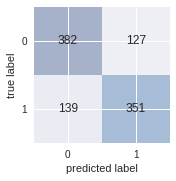

######################################################################

 NB Classification after removing stop words
######################################################################
TF Matrix Created...
length of vector :  8224
Classifier Trained...
Cross Fold Validation Done...
accuracy score:  0.7307307307307307
precision score:  0.7307419114674114
recall score:  0.7307307307307307
classification_report: 
               precision    recall  f1-score   support

        0.0       0.74      0.73      0.74       509
        1.0       0.73      0.73      0.73       490

avg / total       0.73      0.73      0.73       999

confusion_matrix:
  [[374 135]
 [134 356]]


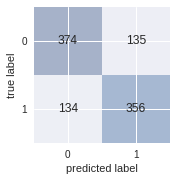

######################################################################

 NB Classification after removing stop words+stemming
######################################################################
TF Matrix Created...
length of vector :  3794
Classifier Trained...
Cross Fold Validation Done...
accuracy score:  0.7007007007007007
precision score:  0.7008648172572436
recall score:  0.7007007007007007
classification_report: 
               precision    recall  f1-score   support

        0.0       0.70      0.73      0.71       509
        1.0       0.70      0.67      0.69       490

avg / total       0.70      0.70      0.70       999

confusion_matrix:
  [[371 138]
 [161 329]]


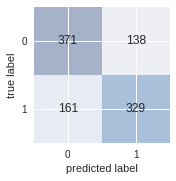

######################################################################
NB Classification into 5 Classes
######################################################################
Classifier Trained...
Cross Fold Validation Done...
accuracy score:  0.34434434434434436
precision score:  0.3595803992918165
recall score:  0.34434434434434436
classification_report: 
               precision    recall  f1-score   support

          1       0.59      0.50      0.54       179
          2       0.22      0.16      0.19       135
          3       0.30      0.32      0.31       195
          4       0.26      0.36      0.30       253
          5       0.42      0.33      0.37       237

avg / total       0.36      0.34      0.35       999

confusion_matrix:
  [[ 89  30  27  23  10]
 [ 23  22  42  38  10]
 [ 15  16  63  84  17]
 [  6  19  64  91  73]
 [ 17  11  17 113  79]]


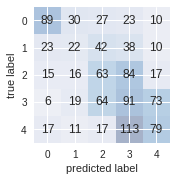


 SVC Classification w/o any processing
######################################################################
TF Matrix Created...
length of vector :  3794
Classifier Trained...
Cross Fold Validation Done...
accuracy score:  0.6546546546546547
precision score:  0.6545967421821178
recall score:  0.6546546546546547
classification_report: 
               precision    recall  f1-score   support

        0.0       0.66      0.68      0.67       509
        1.0       0.65      0.63      0.64       490

avg / total       0.65      0.65      0.65       999

confusion_matrix:
  [[344 165]
 [180 310]]


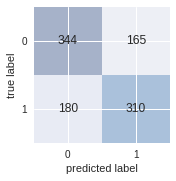


 SVC Classification after removing stop words
######################################################################
TF Matrix Created...
length of vector :  3794
Classifier Trained...
Cross Fold Validation Done...
accuracy score:  0.6546546546546547
precision score:  0.6545967421821178
recall score:  0.6546546546546547
classification_report: 
               precision    recall  f1-score   support

        0.0       0.66      0.68      0.67       509
        1.0       0.65      0.63      0.64       490

avg / total       0.65      0.65      0.65       999

confusion_matrix:
  [[344 165]
 [180 310]]


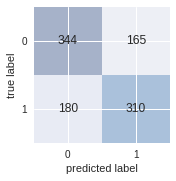

######################################################################

 SVC Classification after removing stop words+stemming
TF Matrix Created...
length of vector :  3794
Classifier Trained...
Cross Fold Validation Done...
accuracy score:  0.6546546546546547
precision score:  0.6545967421821178
recall score:  0.6546546546546547
classification_report: 
               precision    recall  f1-score   support

        0.0       0.66      0.68      0.67       509
        1.0       0.65      0.63      0.64       490

avg / total       0.65      0.65      0.65       999

confusion_matrix:
  [[344 165]
 [180 310]]


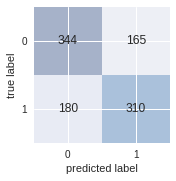

SVC Classification into 5 Classes
Classifier Trained...
Cross Fold Validation Done...
accuracy score:  0.3303303303303303
precision score:  0.32437136897206387
recall score:  0.3303303303303303
classification_report: 
               precision    recall  f1-score   support

          1       0.50      0.47      0.49       179
          2       0.17      0.14      0.15       135
          3       0.26      0.25      0.25       195
          4       0.26      0.26      0.26       253
          5       0.40      0.48      0.44       237

avg / total       0.32      0.33      0.33       999

confusion_matrix:
  [[ 85  22  26  17  29]
 [ 28  19  35  34  19]
 [ 23  33  48  63  28]
 [ 16  25  54  65  93]
 [ 17  13  20  74 113]]


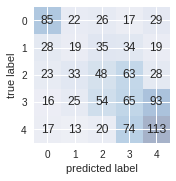


 SVC Classification without any processing
######################################################################
TF Matrix Created...
length of vector :  3794
Classifier Trained...
Cross Fold Validation Done...
accuracy score:  0.6976976976976977
precision score:  0.6977564248017608
recall score:  0.6976976976976977
classification_report: 
               precision    recall  f1-score   support

        0.0       0.70      0.70      0.70       509
        1.0       0.69      0.70      0.69       490

avg / total       0.70      0.70      0.70       999

confusion_matrix:
  [[356 153]
 [149 341]]


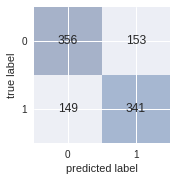


 NB Classification after removing stop words
######################################################################
TF Matrix Created...
length of vector :  3794
Classifier Trained...
Cross Fold Validation Done...
accuracy score:  0.6976976976976977
precision score:  0.6977564248017608
recall score:  0.6976976976976977
classification_report: 
               precision    recall  f1-score   support

        0.0       0.70      0.70      0.70       509
        1.0       0.69      0.70      0.69       490

avg / total       0.70      0.70      0.70       999

confusion_matrix:
  [[356 153]
 [149 341]]


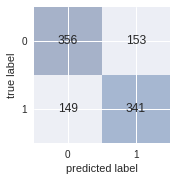


 SVC Classification after removing stop words+stemming
TF Matrix Created...
length of vector :  3794
Classifier Trained...
Cross Fold Validation Done...
accuracy score:  0.6976976976976977
precision score:  0.6977564248017608
recall score:  0.6976976976976977
classification_report: 
               precision    recall  f1-score   support

        0.0       0.70      0.70      0.70       509
        1.0       0.69      0.70      0.69       490

avg / total       0.70      0.70      0.70       999

confusion_matrix:
  [[356 153]
 [149 341]]


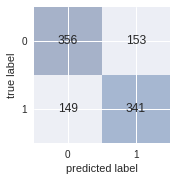

SVC Classification into 5 Classes
Classifier Trained...
Cross Fold Validation Done...
accuracy score:  0.34734734734734735
precision score:  0.3374039226673212
recall score:  0.34734734734734735
classification_report: 
               precision    recall  f1-score   support

          1       0.55      0.58      0.56       179
          2       0.21      0.14      0.17       135
          3       0.26      0.24      0.25       195
          4       0.25      0.26      0.26       253
          5       0.41      0.47      0.44       237

avg / total       0.34      0.35      0.34       999

confusion_matrix:
  [[103  19  22  13  22]
 [ 29  19  36  31  20]
 [ 27  24  46  73  25]
 [ 13  22  57  67  94]
 [ 15   8  18  84 112]]


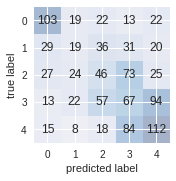

In [0]:
!ls
def main():
  import re
  f = open("yelp_academic_dataset_review.json")

  line = f.readline()
  dictSent = {}
  dictStar = {}
  reviewList = []
  i = 1
  sentiment = 'negative'
  ps = PorterStemmer()
  #cnter=0
  while line:
    #cnter+=1
    line = f.readline()
    review = json.loads(line)
    index = i
    star = review["stars"]
    text = review["text"]
    text = text.lower()
    #		text = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", text)
    text = re.sub(r"\'s", " \'s", text)
    text = re.sub(r"\'ve", " \'ve", text)
    text = re.sub(r"n\'t", " n\'t", text)
    text = re.sub(r"\'re", " \'re", text)
    text = re.sub(r"\'d", " \'d", text)
    text = re.sub(r"\'ll", " \'ll", text)
    text = re.sub(r",", " , ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\(", " \( ", text)
    text = re.sub(r"\)", " \) ", text)
    text = re.sub(r"\?", " \? ", text)
    text = re.sub(r"\s{2,}", " ", text)

    if star > 3:
      sentiment = '1.0'  # positive
    else:
      sentiment = '0.0'  # negative
    dictSent[index] = sentiment
    dictStar[index] = star
    reviewList.append([index, text])
    i += 1
    if i == 1000:
      break
  f.close()

  print "Dataset Loaded..."
  tokenizedWords = tokenize_Review_text(reviewList)
  print "Reviews Tokenized..."
  naive_bayes_function(tokenizedWords, dictSent, dictStar)
  svm_function(tokenizedWords, dictSent, dictStar)
  logistic_function(tokenizedWords, dictSent, dictStar)

# #reviewPosTag=tokenize_Review_text(reviewList)

if __name__ == "__main__":
  main()

## Results

### Naive Bayes
Multinomianal-Naive Bayes is evaluated on 100,000 instances. The results are represented with precision,
recall and f1-score metrics. First, polarity of the reviews are observed (Fig. 2). Then same methods
are implemented on 5 classes which represent 5 stars (Fig. 3). The results are observed relatively high
for 2 classes polarity evaluation. However, a significant decrease is observed in the results for 5 classes.
This inference can be based on the fact that lexicons with 4 and 5 stars are relatively close and lexicons
with rating of 1,2 and 3 are relatively close.

![alt text](https://github.com/PeterCapaldi/Yelp-Rating-Prediction/raw/master/image/ta1.png)
![alt text](https://github.com/PeterCapaldi/Yelp-Rating-Prediction/raw/master/image/ta2.png)


### Support Vector Machine
Support Vector Machines is a discriminative classifier formally defined by a separating hyperplane. The
algorithm outputs an optimal hyperplane which categorizes new incoming instances, given labeled training
data.

![alt text](https://github.com/PeterCapaldi/Yelp-Rating-Prediction/raw/master/image/ta5.png)
![alt text](https://github.com/PeterCapaldi/Yelp-Rating-Prediction/raw/master/image/ta6.png)

### Logistic Reg3ession
The outcome is measured with a dichotomous variable (in
this case, t4o to five possible outcomes). The goal was to find the best fitting model to describe the relationship
between the dichotomous characteristic of interest (reviews) and a set of independent variables.

![alt text](https://github.com/PeterCapaldi/Yelp-Rating-Prediction/raw/master/image/ta3.png)
![alt text](https://github.com/PeterCapaldi/Yelp-Rating-Prediction/raw/master/image/ta4.png)
